In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In [9]:
class CanonicalSystem():
    """Implementation of the canonical dynamical system
    as described in Dr. Stefan Schaal's (2002) paper"""

    def __init__(self, dt, ax=1.0, pattern='discrete'):
        """Default values from Schaal (2012)

        dt float: the timestep
        ax float: a gain term on the dynamical system
        pattern string: either 'discrete' or 'rhythmic'
        """
        self.ax = ax

        self.pattern = pattern
        if pattern == 'discrete':
            self.step = self.step_discrete
            self.run_time = 1.0 # IF IS DISCRETE GOES UP TO 1
        elif pattern == 'rhythmic':
            self.step = self.step_rhythmic
            self.run_time = 2*np.pi # IF RHITMIC, IT REPEATS EVERY 2pi
        else:
            raise Exception('Invalid pattern type specified: \
                Please specify rhythmic or discrete.')

        self.dt = dt
        self.timesteps = int(self.run_time / self.dt)

        self.reset_state()

    def rollout(self, **kwargs):
        """Generate x for open loop movements.
        """
        if 'tau' in kwargs:
            timesteps = int(self.timesteps / kwargs['tau'])
        else:
            timesteps = self.timesteps
        self.x_track = np.zeros(timesteps)

        self.reset_state()
        for t in range(timesteps):
            self.x_track[t] = self.x
            self.step(**kwargs)

        return self.x_track

    def reset_state(self):
        """Reset the system state"""
        self.x = 1.0

    def step_discrete(self, tau=1.0, error_coupling=1.0):
        """Generate a single step of x for discrete
        (potentially closed) loop movements.
        Decaying from 1 to 0 according to dx = -ax*x.

        tau float: gain on execution time
                   increase tau to make the system execute faster
        error_coupling float: slow down if the error is > 1
        """
        self.x += (-self.ax * self.x * error_coupling) * tau * self.dt
        return self.x

    def step_rhythmic(self, tau=1.0, error_coupling=1.0):
        """Generate a single step of x for rhythmic
        closed loop movements. Decaying from 1 to 0
        according to dx = -ax*x.

        tau float: gain on execution time
                   increase tau to make the system execute faster
        error_coupling float: slow down if the error is > 1
        """
        self.x += (1 * error_coupling * tau) * self.dt
        return self.x


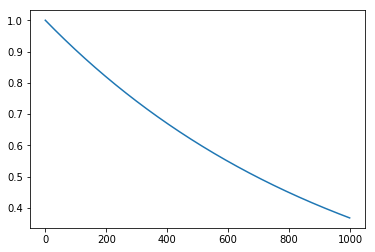

In [18]:
cs = CanonicalSystem(dt=.001, pattern='discrete')
# test normal rollout
x_track1 = cs.rollout()

cs.reset_state()


plt.plot(x_track1)

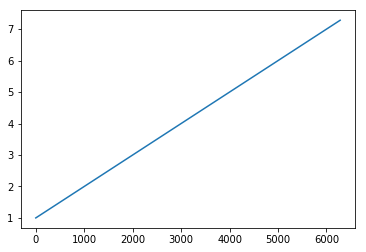

In [19]:

cs2 = CanonicalSystem(dt=.001, pattern='rhythmic')
# test normal rollout
x_track2 = cs2.rollout()

cs2.reset_state()


plt.plot(x_track2)




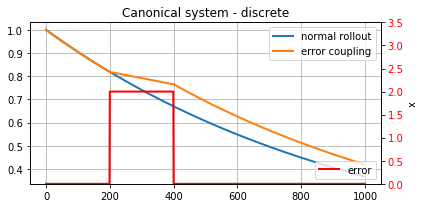

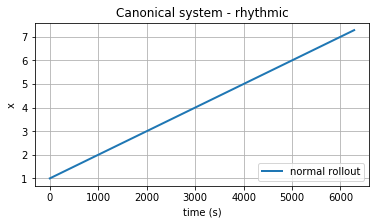

In [12]:
cs.reset_state()
# test error coupling
timesteps = int(1.0/.001)
x_track2 = np.zeros(timesteps)
err = np.zeros(timesteps)
err[200:400] = 2
err_coup = 1.0 / (1 + err)
for i in range(timesteps):
    x_track2[i] = cs.step(error_coupling=err_coup[i])

    
    
    
    
fig, ax1 = plt.subplots(figsize=(6,3))
ax1.plot(x_track1, lw=2)
ax1.plot(x_track2, lw=2)
plt.grid()
plt.legend(['normal rollout', 'error coupling'])
ax2 = ax1.twinx()
ax2.plot(err, 'r-', lw=2)
plt.legend(['error'], loc='lower right')
plt.ylim(0, 3.5)
plt.xlabel('time (s)')
plt.ylabel('x')
plt.title('Canonical system - discrete')

for t1 in ax2.get_yticklabels():
    t1.set_color('r')

plt.tight_layout()

cs = CanonicalSystem(dt=.001, pattern='rhythmic')
# test normal rollout
x_track1 = cs.rollout()

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6,3))
ax1.plot(x_track1, lw=2)
plt.grid()
plt.legend(['normal rollout'], loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('x')
plt.title('Canonical system - rhythmic')
plt.show()
